#### Chapter 16
Dataframes

#### Note
You will see many examples of ”tweak” functions later in this book. This is a pattern I like to
follow. At the top of my Jupyter notebook, I will load the raw data into a dataframe. Then
in the cell below that, I will make a tweak function (usually written with this chain style) that
takes the raw data and returns a cleaned-up dataset.
This is advantageous for a few reasons. If you have used Jupyter for a while, then you will
know that your notebook may get unwieldy, it has many cells, and you may have executed
them in an arbitrary order as you were working. When you come back to your notebook, it
can be hard to get back to the state where your data is in the form that you want it to be. If you
follow this pattern, it makes it easy to open up a notebook, load the raw data, and then clean it
up in the next cell.
Another advantage of writing this as a function is that you can pull this out and leverage it
in production code.
I strongly recommend that you start adopting this practice in your notebooks, and it will
provide a big improvement to your data workﬂow.

```def tweak_siena_pres ( df ):

    def int64_to_uint8 ( df_ ):

        cols = df_ . select_dtypes (' int64 ')

        return ( df_

        . astype ({ col :' uint8 ' for col in cols }))

    return ( df

    . rename ( columns ={ ' Seq . ': ' Seq '})
    # 1

    . rename ( columns ={ k:v. replace (' ', '_ ') for k , v in

    {'Bg ': ' Background ',

    'PL ': ' Party leadership ', 'CAb ': ' Communication ability ' ,

    'RC ': ' Relations with Congress ', 'CAp ': ' Court appointments ' ,

    'HE ': ' Handling of economy ', 'L ': 'Luck ' ,

    'AC ': ' Ability to compromise ', 'WR ': ' Willing to take risks ' ,

    'EAp ': ' Executive appointments ', 'OA ': ' Overall ability ' ,

    'Im ': ' Imagination ', 'DA ': ' Domestic accomplishments ' ,

    'Int ': ' Integrity ', 'EAb ': ' Executive ability ' ,

    'FPA ': ' Foreign policy accomplishments ' ,

    'LA ': ' Leadership ability ',

    'IQ ': ' Intelligence ', 'AM ': ' Avoid crucial mistakes ' ,

    'EV ': " Experts ' view ", 'O ': ' Overall '}. items ()})

    . astype ({ ' Party ': ' category '}) # 2

    . pipe ( int64_to_uint8 ) # 3

    . assign ( Average_rank = lambda df_ :( df_ . select_dtypes ( ' uint8 ') # 4

    . sum ( axis =1). rank ( method =' dense '). astype ( ' uint8 ')) ,

    Quartile = lambda df_ : pd . qcut ( df_ . Average_rank , 4 ,

    labels = '1 st 2 nd 3 rd 4th '. split ())

    )

)```

In [ ]:
df = {
' index ':[0 ,1 ,2] ,
' cols ': [
{ ' name ': ' growth ' ,
' data ':[.5 , .7 , 1.2] },
{ ' name ': ' Name ',
'data ':[ ' Paul ' , ' George ', ' Ringo '] },]}

In [ ]:
def get_row ( df , idx ):

    results = []

    value_idx = df [' index ']. index ( idx )

    for col in df [ ' cols ']:

        results . append ( col [' data '][ value_idx ])

    return results
get_row ( df , 1)

In [4]:
import pandas as pd
df = pd . DataFrame ({' growth ':[.5 , .7 , 1.2] ,
' Name ':[ ' Paul ', ' George ' , ' Ringo '] })
df

,growth,Name
0,0.5,Paul
1,0.7,George
2,1.2,Ringo


In [2]:
df [ ' Name ']. str . lower ()

0       paul 
1     george 
2      ringo 
Name:  Name , dtype: object

#### Note
The DataFrame overrides __getattr__ to allow access to columns as attributes. This tends to work
ok, but will fail if the column name conﬂicts with an existing method or attribute. It will also
fail if the column has a non-valid attribute name (such as a column name with a space):
>>> df . Name
0
Paul
1
George
2
Ringo
Name : Name , dtype : object
You will ﬁnd many who advise never to use attribute access to pull out a column, and they
prefer using the index lookup. While the index lookup will work even with columns that do
not have proper Python attribute names (alpha-numeric or underscore), I ﬁnd that I often use
attribute access when using Jupyter! Why is that? Because tab completion works better when
using attribute access. (I also tend to clean up my column names to non-conﬂicting Python
attribute names.)

In [7]:
df . sum ( axis =0)
# df . sum ( axis = ' index ')

growth                       2.4
Name        Paul  George  Ringo 
dtype: object

### Tip
Here is a clue to help remember which axis is 0 and which is 1. Think back to a Series. It, like
a DataFrame, has an index. Axis 0 is along the index. A mnemonic to aid in remembering is that
the 1 looks like a column (axis 1 is across columns):
```
>>> df = pd . DataFrame (
    { ' Score1 ': [ None , None ],
' Score2 ': [85 , 90]})

If we want to sum up each of the columns, then we sum down the index or row axis (axis=0):

>>> df . apply ( np . sum , axis =0)

To sum along every row, we sum across the columns axis (axis=1):

>>> df . apply ( np . sum , axis =1)

```

In [8]:
pd.DataFrame(data=None, index=None,
columns=None).axes

[RangeIndex(start=0, stop=0, step=1), RangeIndex(start=0, stop=0, step=1)]

#### 16.6 Summary
In this chapter, we introduced a Python data structure that is similar to how the pandas dataframe
is implemented. It illustrated the index and the columnar nature of the dataframe. Then we looked
at the main components of the dataframe and how columns are really just series objects. We saw
various ways to construct dataframes. Finally, we looked at the two axes of the dataframe.
In future chapters, we will dig in more and see the dataframe in action.

#### 16.7 Exercises
1. Create a dataframe with the names of your colleagues, their age (or an estimate), and their
title.
2. Capitalize the values in the name column.
3. Sum up the values of the age column.

Chapter 17
Similarities with Series and DataFrame

In [14]:
url = 'https://en.wikipedia.org/wiki/Historical_rankings_of_presidents_of_the_United_States'
pres_dfs = pd.read_html(url)
type(pres_dfs)
df = pres_dfs [ -4]


list

In [ ]:
df. iloc [1: -1].rename( columns ={ 'Political party': 'Party'}). assign ( Party = lambda df_ : df_. Party. str . replace (r'\[.*\]' ,''). astype ( ' category '))

In [20]:
# import pandas as pd
# url = 'https://github.com/mattharrison/datasets/raw/master/data/siena2018-pres.csv'
# df = pd . read_csv ( url , index_col =0)
df

,Seq.,President,Party,Bg,Im,Int,IQ,L,WR,AC,...,PL,RC,CAp,HE,EAp,DA,FPA,AM,EV,O
1,1,George Washington,Independent,7,7,1,10,1,6,2,...,18,1,1,1,1,2,2,1,2,1
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,28,17,4,13,15,19,13,16,10,14
3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,...,5,5,7,20,4,6,9,7,5,5
4,4,James Madison,Democratic-Republican,4,6,7,3,16,15,6,...,9,10,6,14,7,11,19,11,8,7
5,5,James Monroe,Democratic-Republican,9,14,11,18,6,16,7,...,12,8,11,9,9,10,5,6,9,8
6,6,John Quincy Adams,Democratic-Republican,1,9,6,5,29,19,24,...,29,29,15,17,18,21,15,14,18,18
7,7,Andrew Jackson,Democratic,37,15,29,28,4,4,38,...,6,16,30,25,25,17,23,20,19,19
8,8,Martin Van Buren,Democratic,23,22,27,25,34,28,20,...,16,23,25,31,26,29,27,24,28,25
9,9,William Henry Harrison,Whig,22,38,28,37,44,32,41,...,36,37,42,41,40,42,44,37,39,39
10,10,John Tyler,Independent,34,33,35,34,22,26,37,...,41,40,38,34,36,36,26,32,36,37


In [21]:
df.dtypes

Seq.         object
President    object
Party        object
Bg            int64
Im            int64
Int           int64
IQ            int64
L             int64
WR            int64
AC            int64
EAb           int64
LA            int64
CAb           int64
OA            int64
PL            int64
RC            int64
CAp           int64
HE            int64
EAp           int64
DA            int64
FPA           int64
AM            int64
EV            int64
O             int64
dtype: object

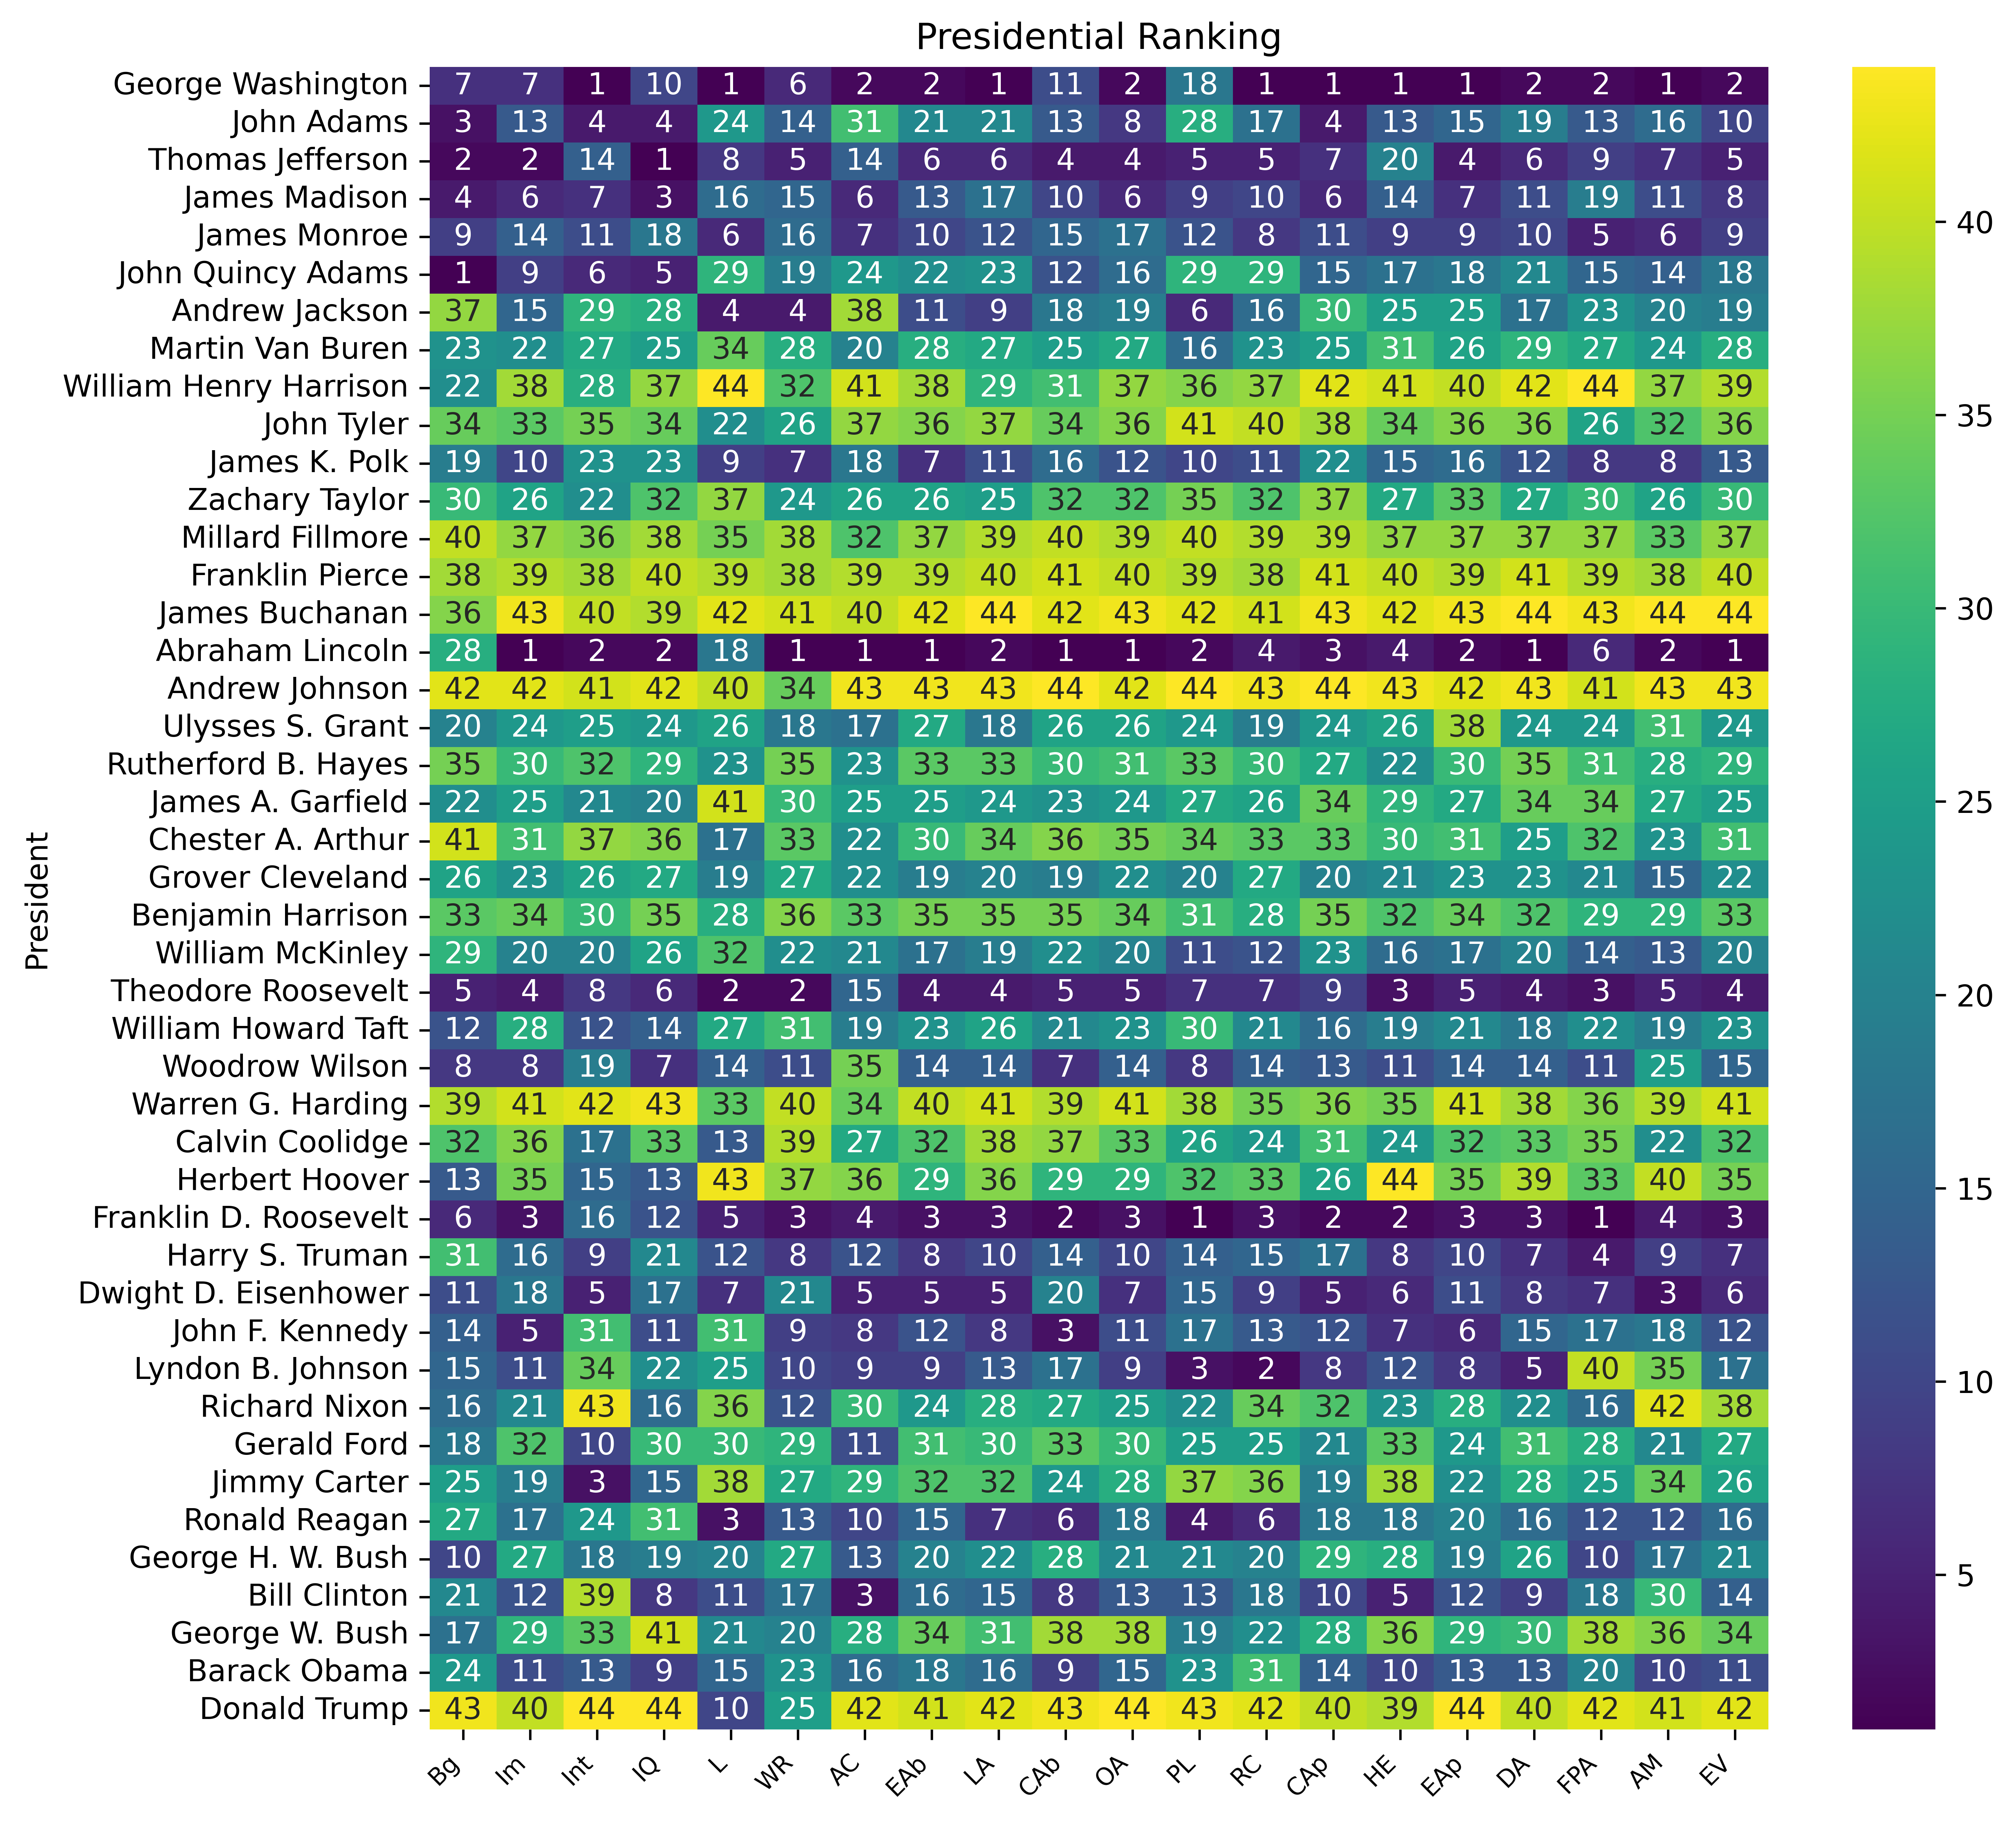

In [25]:
import matplotlib . pyplot as plt
import seaborn as sns

# def tweak_sn
fig , ax = plt . subplots ( figsize =(10 ,10) , dpi =600)
g = sns . heatmap (( df . set_index ('President'). iloc [: ,2: -1]) , annot = True , cmap = 'viridis', ax = ax )
g . set_xticklabels (g . get_xticklabels () , rotation =45 , fontsize =8 ,ha = 'right')
_ = plt . title ('Presidential Ranking')
# fig . savefig ( ' img / pandas2 /20 - pres . png ', bbox_inches = ' tight ')

In [26]:
df.sample(n=30, frac=None,
replace=False, weights=None,
random_state=None, axis=None)

,Seq.,President,Party,Bg,Im,Int,IQ,L,WR,AC,...,PL,RC,CAp,HE,EAp,DA,FPA,AM,EV,O
32,33,Harry S. Truman,Democratic,31,16,9,21,12,8,12,...,14,15,17,8,10,7,4,9,7,9
6,6,John Quincy Adams,Democratic-Republican,1,9,6,5,29,19,24,...,29,29,15,17,18,21,15,14,18,18
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,28,17,4,13,15,19,13,16,10,14
12,12,Zachary Taylor,Whig,30,26,22,32,37,24,26,...,35,32,37,27,33,27,30,26,30,30
40,41,George H. W. Bush,Republican,10,27,18,19,20,27,13,...,21,20,29,28,19,26,10,17,21,21
4,4,James Madison,Democratic-Republican,4,6,7,3,16,15,6,...,9,10,6,14,7,11,19,11,8,7
22,22/24,Grover Cleveland,Democratic,26,23,26,27,19,27,22,...,20,27,20,21,23,23,21,15,22,23
3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,...,5,5,7,20,4,6,9,7,5,5
29,30,Calvin Coolidge,Republican,32,36,17,33,13,39,27,...,26,24,31,24,32,33,35,22,32,31
30,31,Herbert Hoover,Republican,13,35,15,13,43,37,36,...,32,33,26,44,35,39,33,40,35,36


In [ ]:
def tweak_siena_pres ( df ):

    def int64_to_uint8 ( df_ ):

        cols = df_ . select_dtypes (' int64 ')

        return ( df_

        . astype ({ col :' uint8 ' for col in cols }))

    return ( df

    . rename ( columns ={ ' Seq . ': ' Seq '})
    # 1

    . rename ( columns ={ k:v. replace (' ', '_ ') for k , v in

    {'Bg ': ' Background ',

    'PL ': ' Party leadership ', 'CAb ': ' Communication ability ' ,

    'RC ': ' Relations with Congress ', 'CAp ': ' Court appointments ' ,

    'HE ': ' Handling of economy ', 'L ': 'Luck ' ,

    'AC ': ' Ability to compromise ', 'WR ': ' Willing to take risks ' ,

    'EAp ': ' Executive appointments ', 'OA ': ' Overall ability ' ,

    'Im ': ' Imagination ', 'DA ': ' Domestic accomplishments ' ,

    'Int ': ' Integrity ', 'EAb ': ' Executive ability ' ,

    'FPA ': ' Foreign policy accomplishments ' ,

    'LA ': ' Leadership ability ',

    'IQ ': ' Intelligence ', 'AM ': ' Avoid crucial mistakes ' ,

    'EV ': " Experts ' view ", 'O ': ' Overall '}. items ()})

    . astype ({ ' Party ': ' category '}) # 2

    . pipe ( int64_to_uint8 ) # 3

    . assign ( Average_rank = lambda df_ :( df_ . select_dtypes ( ' uint8 ') # 4

    . sum ( axis =1). rank ( method =' dense '). astype ( ' uint8 ')) ,

    Quartile = lambda df_ : pd . qcut ( df_ . Average_rank , 4 ,

    labels = '1 st 2 nd 3 rd 4th '. split ())

    )

)